<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Upstream_Pipeline_of_Proposed_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
url = 'http://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/fraud_trans_dataset.csv'
df = pd.read_csv(url)

X = df.drop(columns=['Is Fraudulent'])
y = df['Is Fraudulent']

X_0 = X[y == 0]
X_1 = X[y == 1]

In [ ]:
url = 'https://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/main/Cleaned_Data/EmployeeAttrition_Cleaned.csv'
df = pd.read_csv(url)

X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_0 = X[y == 0]
X_1 = X[y == 1]

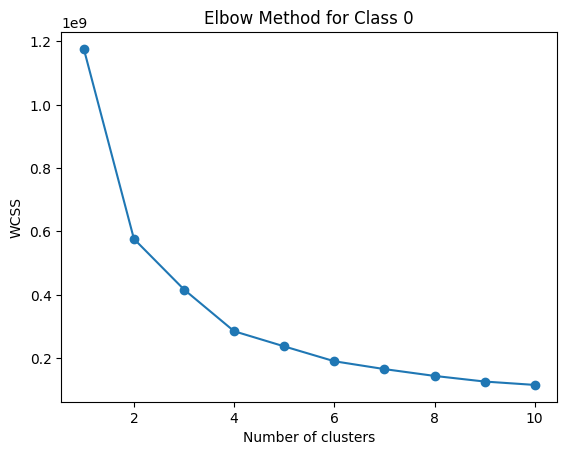

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


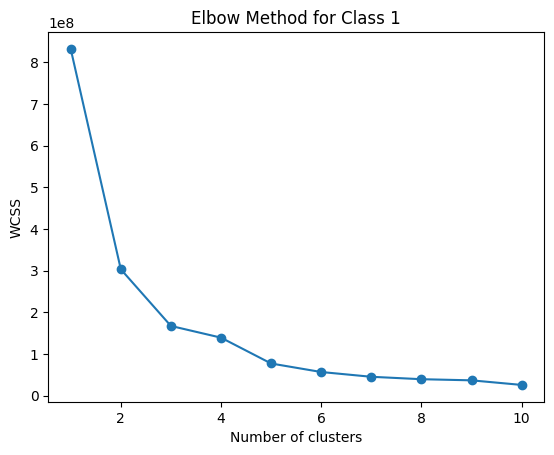

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 4   # <-- set based on elbow visualization
n_clusters_1 = 3   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 7947 samples
Class 0 - Cluster 1: 7985 samples
Class 0 - Cluster 2: 1364 samples
Class 0 - Cluster 3: 5116 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 184 samples
Class 1 - Cluster 1: 1013 samples
Class 1 - Cluster 2: 25 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.'+str(i+1) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.'+str(i+1) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

# Download/export as CSV
final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")

Saved as Clustered_fraudulent.csv


In [ ]:
display(final_df['Cluster_Label'].value_counts())

,count
Cluster_Label,
0.2,7985
0.1,7947
0.4,5116
0.3,1364
1.2,1013
1.1,184
1.3,25


Sparse Cluster Elimination

In [ ]:
filtered_df = final_df[~final_df['Cluster_Label'].isin(['1.1', '1.3'])]

In [ ]:
filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
filtered_df['Cluster_Label'].value_counts()

,count
Cluster_Label,
0.2,7985
0.1,7947
0.4,5116
0.3,1364
1.2,1013


In [ ]:
filtered_df.to_csv('SCE_data_fraudulent.csv', index=False)
print("Saved as SCE_data_fraudulent.csv")

Saved as SCE_data_fraudulent.csv
